# 感知机的朴素实现

In [1]:
import numpy as np

class Perceptron:
    def __init__(self):
        self._w = self._b = None
        
    def fit(self, x, y, lr=0.01, epoch=1000):
        x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
        self._w = np.zeros(x.shape[1])
        self._b = 0.
        for _ in range(epoch):
            y_pred = self.predict(x, raw=True)
            indices = np.random.permutation(len(y))
            idx = indices[np.argmin(np.maximum(0, y_pred * y)[indices])]
            if y[idx] == y_pred[idx]:
                break
            delta = lr * y[idx]
            self._w += delta * x[idx]
            self._b += delta
    
    def predict(self, x, raw=False):
        x = np.asarray(x, np.float32)
        y_pred = x.dot(self._w) + self._b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.float32)

## 生成简单的测试数据集

In [2]:
def gen_two_clusters(size=100, center=0):
    center1 = (np.random.random(2) + center - 0.5) * 2 + 2
    center2 = (np.random.random(2) + center - 0.5) * 2 - 2
    cluster1 = (np.random.randn(size, 2) + center1) * 2
    cluster2 = (np.random.randn(size, 2) + center2) * 2
    data = np.vstack((cluster1, cluster2)).astype(np.float32)
    labels = np.array([1] * size + [-1] * size)
    indices = np.random.permutation(size * 2)
    data, labels = data[indices], labels[indices]
    return data, labels

## 测试

In [3]:
x, y = gen_two_clusters()
perceptron = Perceptron()
perceptron.fit(x, y)
print("准确率：{:8.6} %".format((perceptron.predict(x) == y).mean() * 100))

准确率：   100.0 %


## 可视化

### 画出决策边界

+ 如果只关心算法本身，可以略去这一段代码不看

In [4]:
import matplotlib.pyplot as plt

def visualize2d(clf, x, y, draw_background=False):
    axis, labels = np.asarray(x).T, np.asarray(y)
    decision_function = lambda xx: clf.predict(xx)

    nx, ny, padding = 400, 400, 0.2
    x_min, x_max = np.min(axis[0]), np.max(axis[0])
    y_min, y_max = np.min(axis[1]), np.max(axis[1])
    x_padding = max(abs(x_min), abs(x_max)) * padding
    y_padding = max(abs(y_min), abs(y_max)) * padding
    x_min -= x_padding
    x_max += x_padding
    y_min -= y_padding
    y_max += y_padding

    def get_base(nx, ny):
        xf = np.linspace(x_min, x_max, nx)
        yf = np.linspace(y_min, y_max, ny)
        n_xf, n_yf = np.meshgrid(xf, yf)
        return xf, yf, np.c_[n_xf.ravel(), n_yf.ravel()]

    xf, yf, base_matrix = get_base(nx, ny)
    z = decision_function(base_matrix).reshape((nx, ny))
    
    labels[labels == -1] = 0
    n_label = len(np.unique(labels))
    xy_xf, xy_yf = np.meshgrid(xf, yf, sparse=True)
    colors = plt.cm.rainbow([i / n_label for i in range(n_label)])[labels]

    plt.figure()
    if draw_background:
        plt.pcolormesh(xy_xf, xy_yf, z, cmap=plt.cm.Paired)
    else:
        plt.contour(xf, yf, z, c='k-', levels=[0])
    plt.scatter(axis[0], axis[1], c=colors)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

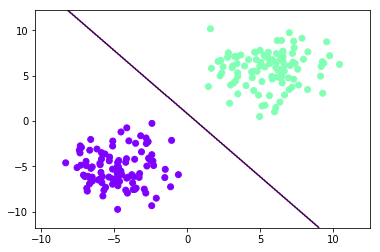

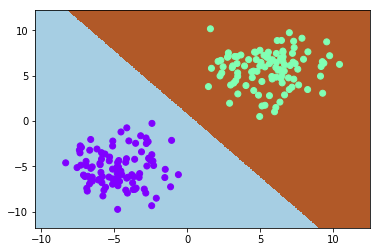

In [5]:
visualize2d(perceptron, x, y)
visualize2d(perceptron, x, y, True)

### 可视化训练过程

+ 实现思路如下：
    + 在每一步迭代时生成一张如上所示的图像
    + 在最后调用相应的第三方库（`imageio`）、将生成的所有图像合成一个 mp4
    + 用`ffmpeg`将 mp4 转为方便分享的 gif

![perceptron](https://cdn.rawgit.com/carefree0910/Resources/cbd5675e/Lines/Perceptron.gif)

![perceptron](https://cdn.rawgit.com/carefree0910/Resources/cbd5675e/Backgrounds/Perceptron.gif)